In [4]:
from dateutil.parser import parse 
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
plt.rcParams.update({'figure.figsize': (10, 7), 'figure.dpi': 120})
df = pd.read_csv('time.csv')
df.head()

,date,value
0,1991-07-01,3.526591
1,1991-08-01,3.180891
2,1991-09-01,3.252221
3,1991-10-01,3.611003
4,1991-11-01,3.565869


In [5]:
import matplotlib.pyplot as plt
df=pd.read_csv('time.csv')

In [10]:
def plot_df(df, x, y, title="", xlabel='Date', ylabel='Value', dpi=100):
    plt.figure(figsize=(16,5), dpi=dpi)
    plt.plot(x, y, color='tab:red')
    plt.gca().set(title=title, xlabel=xlabel, ylabel=ylabel)
    plt.show()

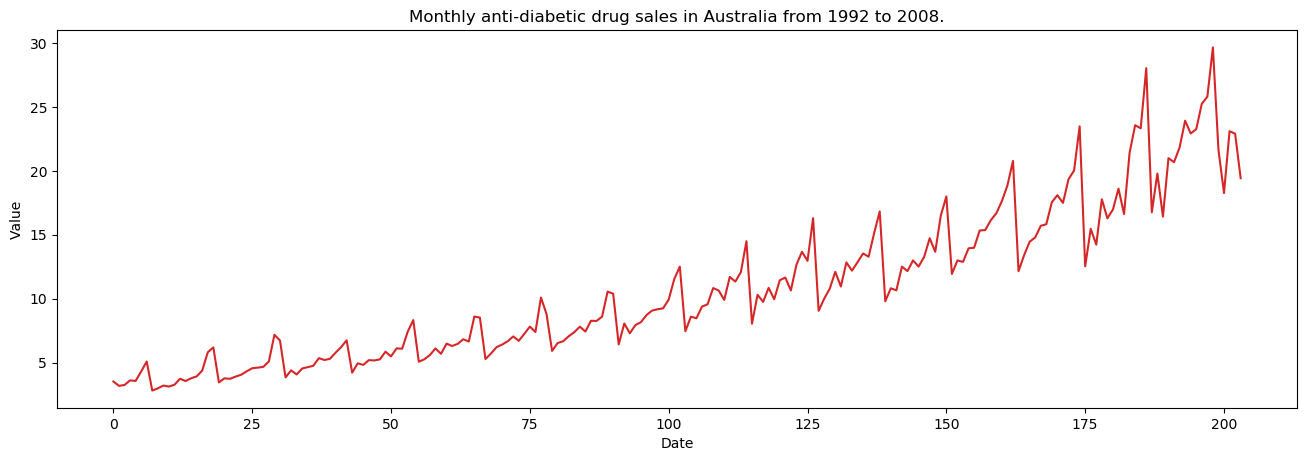

In [11]:
plot_df(df, x=df.index, y=df.value, title='Monthly anti-diabetic drug sales in Australia from 1992 to 2008.')  

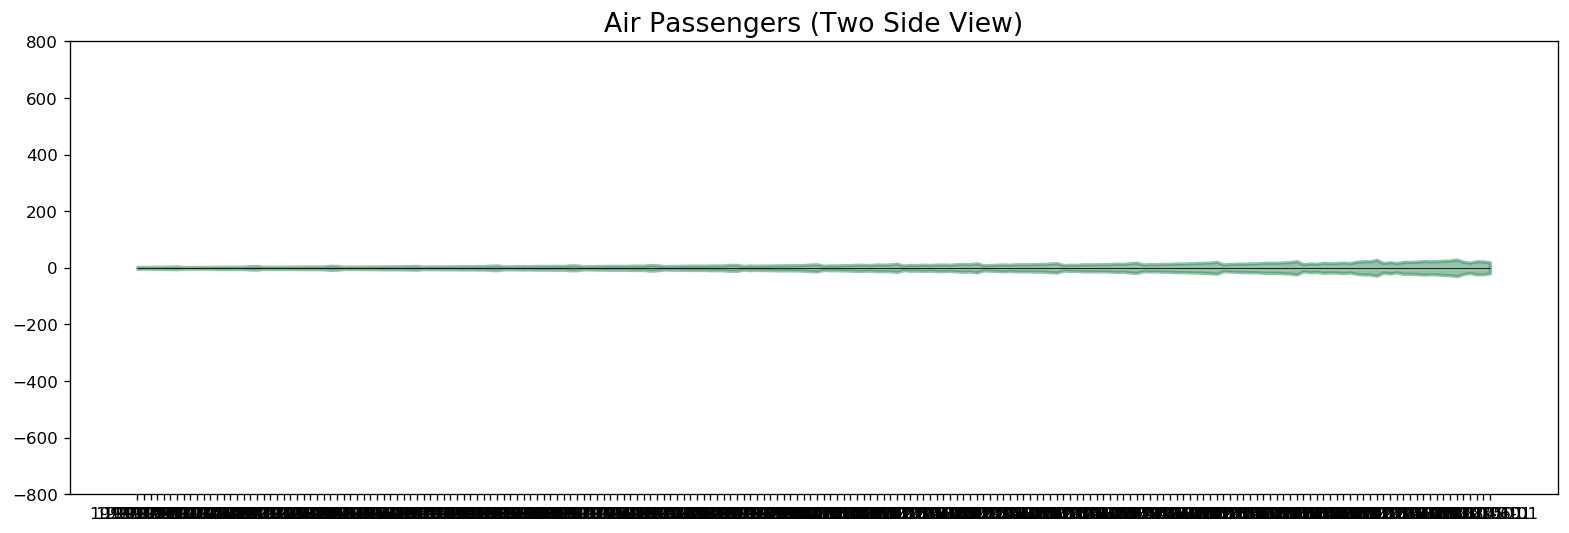

In [12]:
df1=pd.read_csv('AirPassengers.csv')
x = df['date'].values
y1 = df['value'].values

# Plot
fig, ax = plt.subplots(1, 1, figsize=(16,5), dpi= 120)
plt.fill_between(x, y1=y1, y2=-y1, alpha=0.5, linewidth=2, color='seagreen')
plt.ylim(-800, 800)
plt.title('Air Passengers (Two Side View)', fontsize=16)
plt.hlines(y=0, xmin=np.min(df.date), xmax=np.max(df.date), linewidth=.5)
plt.show()

In [16]:
df = pd.read_csv('time.csv', parse_dates=['date'], index_col='date')

In [17]:
df.reset_index(inplace=True)


In [18]:
df['year'] = [d.year for d in df.date]
df['month'] = [d.strftime('%b') for d in df.date]
years = df['year'].unique()


In [21]:
df.head()

,date,value,year,month
0,1991-07-01,3.526591,1991,Jul
1,1991-08-01,3.180891,1991,Aug
2,1991-09-01,3.252221,1991,Sep
3,1991-10-01,3.611003,1991,Oct
4,1991-11-01,3.565869,1991,Nov


In [19]:
# Prep Colors
np.random.seed(100)
mycolors = np.random.choice(list(mpl.colors.XKCD_COLORS.keys()), len(years), replace=False)


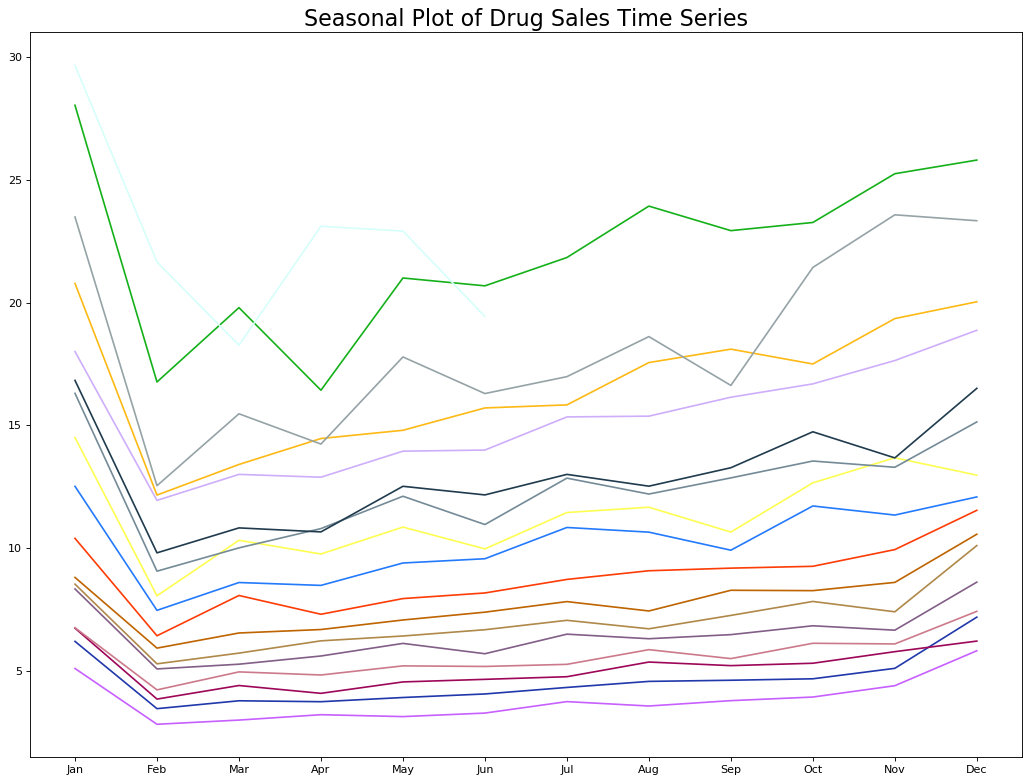

In [25]:
# Draw Plot
plt.figure(figsize=(16,12), dpi= 80)
for i, y in enumerate(years):
    if i > 0:        
        plt.plot('month', 'value', data=df.loc[df.year==y, :], color=mycolors[i], label=y)
        plt.title("Seasonal Plot of Drug Sales Time Series", fontsize=20)
        
       # ylabel='$Drug Sales$', xlabel='$Month$
       # plt.text(df.loc[df.year==y, :].shape[0]-.9, df.loc[df.year==y, 'value'][-1:].values[0], y, fontsize=12, color=mycolors[i])

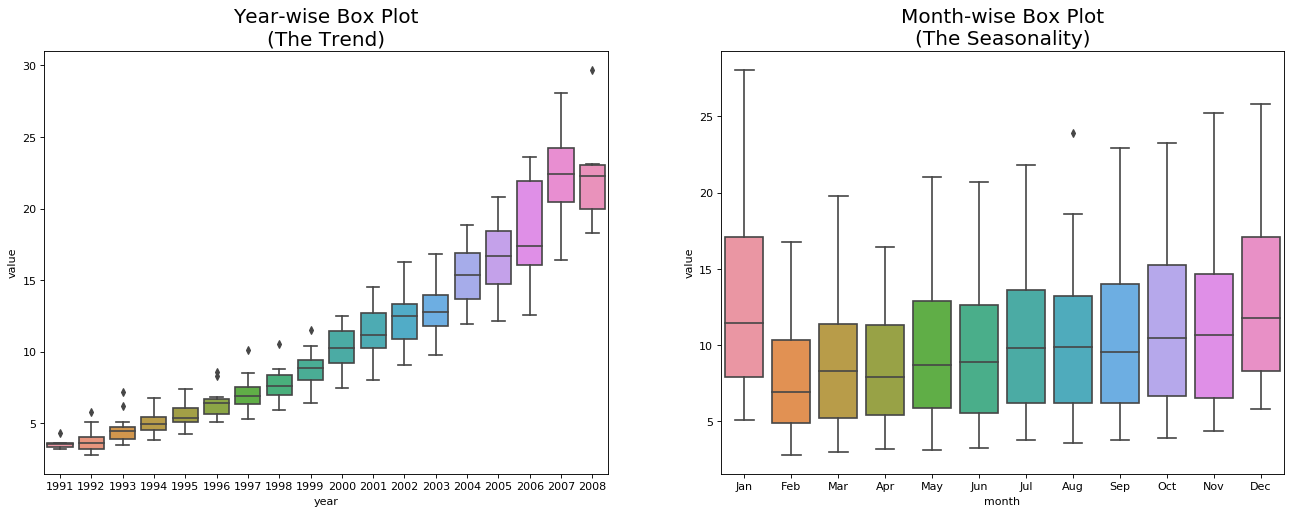

In [27]:
fig, axes = plt.subplots(1, 2, figsize=(20,7), dpi= 80)
sns.boxplot(x='year', y='value', data=df, ax=axes[0])
sns.boxplot(x='month', y='value', data=df.loc[~df.year.isin([1991, 2008]), :])

# Set Title
axes[0].set_title('Year-wise Box Plot\n(The Trend)', fontsize=18); 
axes[1].set_title('Month-wise Box Plot\n(The Seasonality)', fontsize=18)
plt.show()

In [32]:
from statsmodels.tsa.seasonal import seasonal_decompose
from dateutil.parser import parse

In [35]:
df = pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/a10.csv', parse_dates=['date'], index_col='date')


In [36]:
# Multiplicative Decomposition 
result_mul = seasonal_decompose(df['value'], model='multiplicative', extrapolate_trend='freq')

# Additive Decomposition
result_add = seasonal_decompose(df['value'], model='additive', extrapolate_trend='freq')


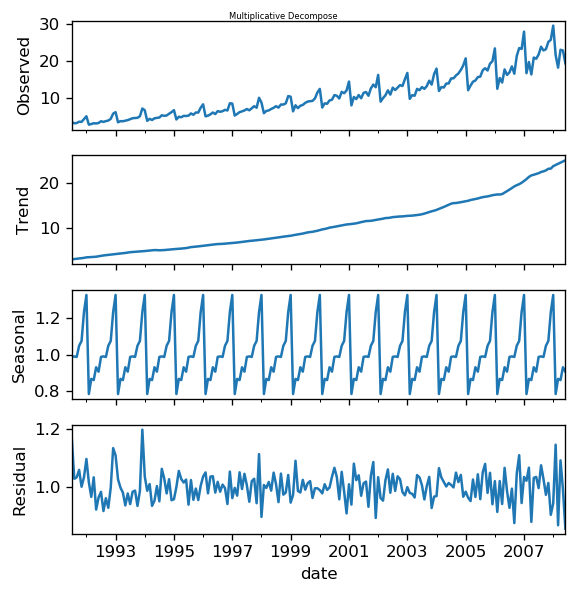

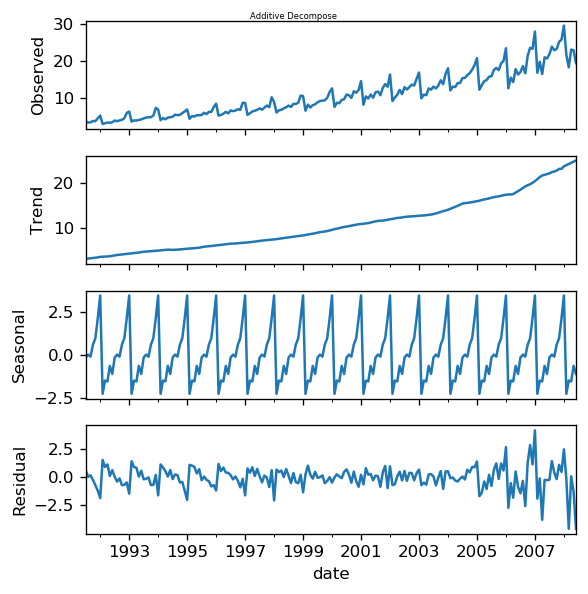

In [39]:
# Plot
plt.rcParams.update({'figure.figsize': (5,5)})
result_mul.plot().suptitle('Multiplicative Decompose', fontsize=5)
result_add.plot().suptitle('Additive Decompose', fontsize=5)
plt.show()

In [40]:
# Extract the Components ----
# Actual Values = Product of (Seasonal * Trend * Resid)
df_reconstructed = pd.concat([result_mul.seasonal, result_mul.trend, result_mul.resid, result_mul.observed], axis=1)
df_reconstructed.columns = ['seas', 'trend', 'resid', 'actual_values']
df_reconstructed.head()

,seas,trend,resid,actual_values
date,,,,
1991-07-01,0.987845,3.060085,1.166629,3.526591
1991-08-01,0.990481,3.124765,1.027745,3.180891
1991-09-01,0.987476,3.189445,1.032615,3.252221
1991-10-01,1.048329,3.254125,1.058513,3.611003
1991-11-01,1.074527,3.318805,0.999923,3.565869


In [41]:
df_reconstructed['calc_val']=df_reconstructed.seas*df_reconstructed.trend*df_reconstructed.resid

In [42]:
df_reconstructed.head()

,seas,trend,resid,actual_values,calc_val
date,,,,,
1991-07-01,0.987845,3.060085,1.166629,3.526591,3.526591
1991-08-01,0.990481,3.124765,1.027745,3.180891,3.180891
1991-09-01,0.987476,3.189445,1.032615,3.252221,3.252221
1991-10-01,1.048329,3.254125,1.058513,3.611003,3.611003
1991-11-01,1.074527,3.318805,0.999923,3.565869,3.565869


In [46]:
df_reconstructed['calc_val']=df_reconstructed.seas*df_reconstructed.trend


In [47]:
df_reconstructed.head()

,seas,trend,resid,actual_values,calc_val
date,,,,,
1991-07-01,0.987845,3.060085,1.166629,3.526591,3.022889
1991-08-01,0.990481,3.124765,1.027745,3.180891,3.095020
1991-09-01,0.987476,3.189445,1.032615,3.252221,3.149499
1991-10-01,1.048329,3.254125,1.058513,3.611003,3.411392
1991-11-01,1.074527,3.318805,0.999923,3.565869,3.566145


In [45]:
def plot_df(df, x, y, title="", xlabel='Date', ylabel='Value', dpi=100):
    plt.figure(figsize=(16,5), dpi=dpi)
    plt.plot(x, y, color='tab:red')
    plt.gca().set(title=title, xlabel=xlabel, ylabel=ylabel)
    plt.show()

In [48]:
plot_df(df_reconstructed, x=df_reconstructed.index, y=df_reconstructed.value, title='Monthly anti-diabetic drug sales in Australia from 1992 to 2008.')  

AttributeError: 'DataFrame' object has no attribute 'value'

In [ ]:
#ARIMA

In [49]:
from statsmodels.tsa.stattools import adfuller
from numpy import log
result = adfuller(df_reconstructed.calc_val.dropna())
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])

ADF Statistic: 2.931310
p-value: 1.000000


In [ ]:
#p value is 1 so go for first differencing

In [59]:
df_reconstructed['1stdiff']=df_reconstructed.calc_val.diff()


In [60]:
result = adfuller(df_reconstructed['1stdiff'].dropna())
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])

ADF Statistic: -0.972192
p-value: 0.763271


In [61]:
df_reconstructed['2stdiff']=df_reconstructed['1stdiff'].diff()

In [62]:
result = adfuller(df_reconstructed['2stdiff'].dropna())
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])

ADF Statistic: -5.061148
p-value: 0.000017


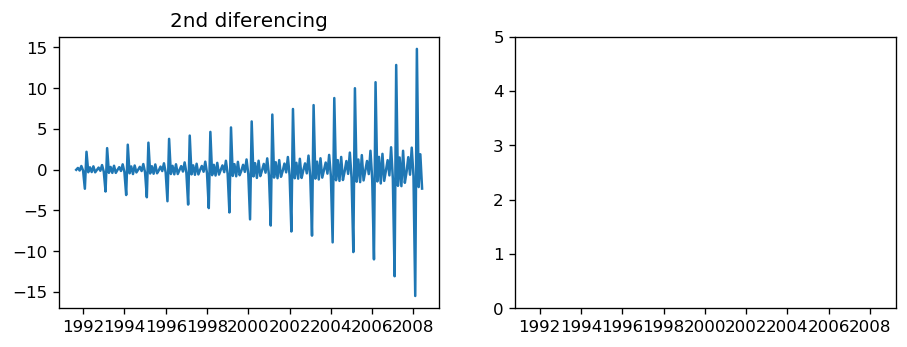

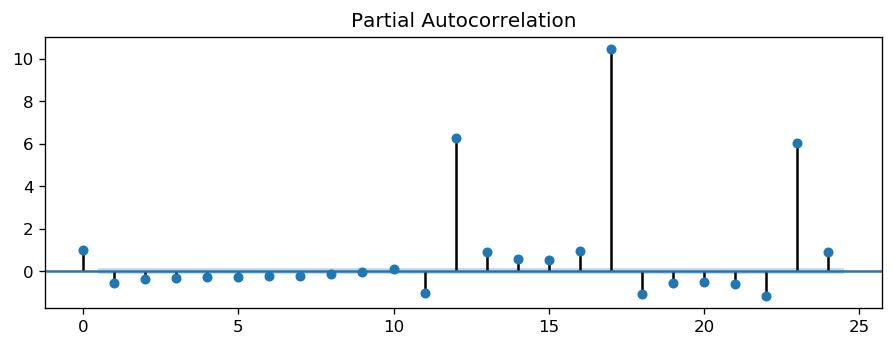

In [79]:
# PACF plot of 1st differenced series
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
plt.rcParams.update({'figure.figsize':(9,3), 'figure.dpi':120})

fig, axes = plt.subplots(1, 2, sharex=True)
axes[0].plot(df_reconstructed['2stdiff'])
axes[0].set_title('2nd diferencing')
axes[1].set(ylim=(0,5))
plot_pacf(df_reconstructed['2stdiff'].dropna())

plt.show()

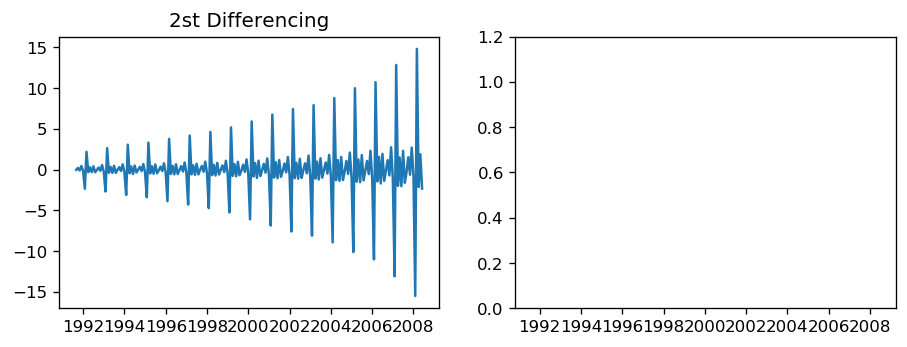

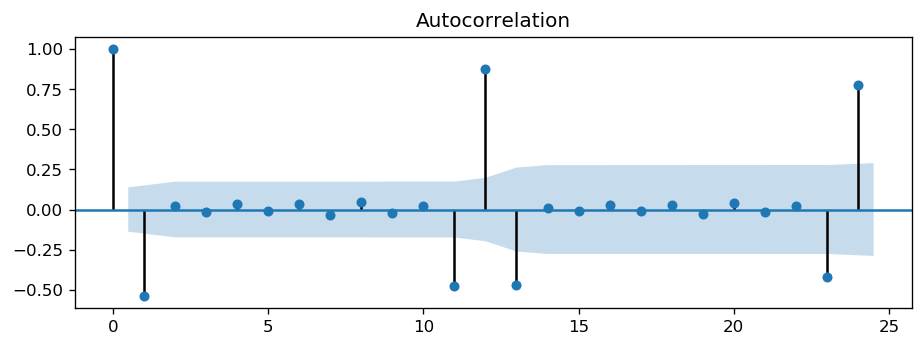

In [82]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

fig, axes = plt.subplots(1, 2, sharex=True)
axes[0].plot(df_reconstructed['2stdiff']); axes[0].set_title('2st Differencing')
axes[1].set(ylim=(0,1.2))
plot_acf(df_reconstructed['2stdiff'].dropna())
plt.show()


In [90]:
from statsmodels.tsa.arima_model import ARIMA
model = ARIMA(df_reconstructed['calc_val'], order=(1,2,1))
model_fit = model.fit(disp=0)
print(model_fit.summary())

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


                             ARIMA Model Results                              
Dep. Variable:            D2.calc_val   No. Observations:                  202
Model:                 ARIMA(1, 2, 1)   Log Likelihood                -432.798
Method:                       css-mle   S.D. of innovations              2.033
Date:                Sun, 03 Nov 2019   AIC                            873.596
Time:                        16:16:44   BIC                            886.829
Sample:                    09-01-1991   HQIC                           878.951
                         - 06-01-2008                                         
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.0007      0.002      0.329      0.743      -0.003       0.005
ar.L1.D2.calc_val    -0.2307      0.068     -3.377      0.001      -0.365      -0.097
ma.L1.D2.calc_val    -1.

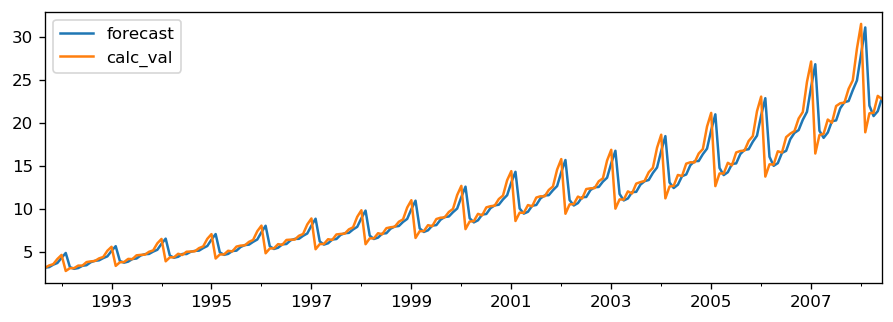

In [91]:
model_fit.plot_predict(dynamic=False)
plt.show()


In [95]:
train = df.value[:150]
test = df.value[150:]

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


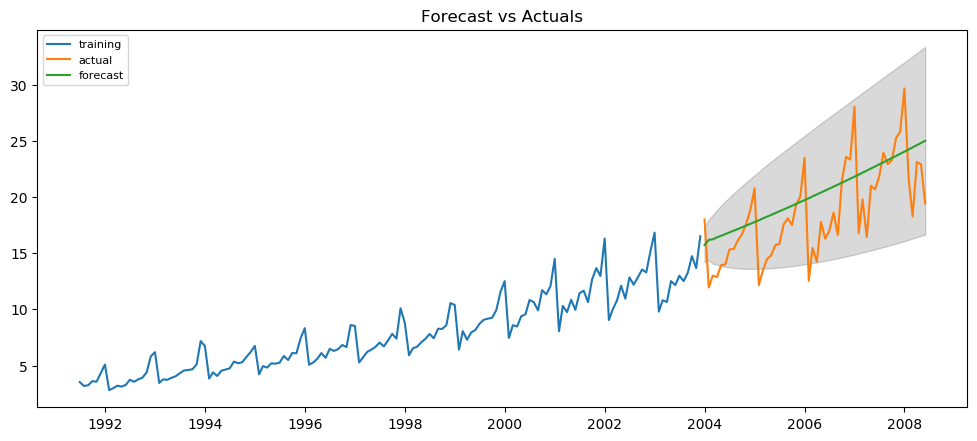

In [109]:
# Build Model
# model = ARIMA(train, order=(3,2,1))  
model = ARIMA(train, order=(1, 2, 1))  
fitted = model.fit(disp=-1)  

# Forecast
fc, se, conf = fitted.forecast(54, alpha=0.3)  # 95% conf

# Make as pandas series
fc_series = pd.Series(fc, index=test.index)
lower_series = pd.Series(conf[:, 0], index=test.index)
upper_series = pd.Series(conf[:, 1], index=test.index)

# Plot
plt.figure(figsize=(12,5), dpi=100)
plt.plot(train, label='training')
plt.plot(test, label='actual')
plt.plot(fc_series, label='forecast')
plt.fill_between(lower_series.index, lower_series, upper_series, 
                 color='k', alpha=.15)
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.show()

In [106]:
se

array([1.4632084 , 1.75107669, 2.08601361, 2.34663499, 2.58953201,
       2.80883974, 3.01307806, 3.20404918, 3.38435048, 3.55549122,
       3.71877379, 3.87517934, 4.02551359, 4.17043182, 4.31048077,
       4.44612046, 4.57774288, 4.70568514, 4.83023968, 4.95166216,
       5.07017761, 5.18598533, 5.29926284, 5.41016909, 5.51884702,
       5.6254258 , 5.73002254, 5.83274389, 5.93368725, 6.03294185,
       6.13058973, 6.22670647, 6.32136192, 6.41462078, 6.50654308,
       6.5971847 , 6.68659773, 6.7748308 , 6.86192944, 6.94793631,
       7.03289145, 7.11683255, 7.19979505, 7.28181242, 7.36291624,
       7.44313637, 7.52250107, 7.60103715, 7.67877004, 7.75572387,
       7.83192162, 7.90738515, 7.98213527, 8.05619184])

In [107]:
fc

array([15.7264083 , 16.18765473, 16.22579482, 16.41019086, 16.54578212,
       16.69939544, 16.84813628, 16.99984819, 17.15184401, 17.30504434,
       17.45913381, 17.61422044, 17.77026724, 17.92728687, 18.08527501,
       18.24423312, 18.40416071, 18.56505794, 18.72692477, 18.8897612 ,
       19.05356724, 19.21834288, 19.38408812, 19.55080297, 19.71848742,
       19.88714147, 20.05676513, 20.22735839, 20.39892126, 20.57145372,
       20.7449558 , 20.91942747, 21.09486875, 21.27127964, 21.44866013,
       21.62701022, 21.80632991, 21.98661921, 22.16787811, 22.35010662,
       22.53330473, 22.71747245, 22.90260976, 23.08871668, 23.27579321,
       23.46383934, 23.65285507, 23.84284041, 24.03379535, 24.22571989,
       24.41861404, 24.61247779, 24.80731114, 25.0031141 ])

In [115]:
!pip3 install pyramid-arima

'pip3' is not recognized as an internal or external command,
operable program or batch file.
